# <a href="https://en.wikipedia.org/wiki/Arcsine_laws_(Wiener_process)">Arcsine Laws</a>

This is a numerical demonstration of the three Arcsine Laws.  
Related Concepts:  
[Random Walk](https://en.wikipedia.org/wiki/Random_walk)  
[Wiener process](https://en.wikipedia.org/wiki/Wiener_process)  
<a href="https://en.wikipedia.org/wiki/Arcsine_laws_(Wiener_process)">Arcsine Laws</a>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec
%pylab inline
#%qtconsole
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
np.random.seed(10)

Populating the interactive namespace from numpy and matplotlib


## [arcsine distribution](https://en.wikipedia.org/wiki/Arcsine_distribution)
A random variable X on [0,1] is arcsine-distributed if (cdf)  
$$
Pr[X \le x] = \frac 2 \pi arcsin(\sqrt x)
$$

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


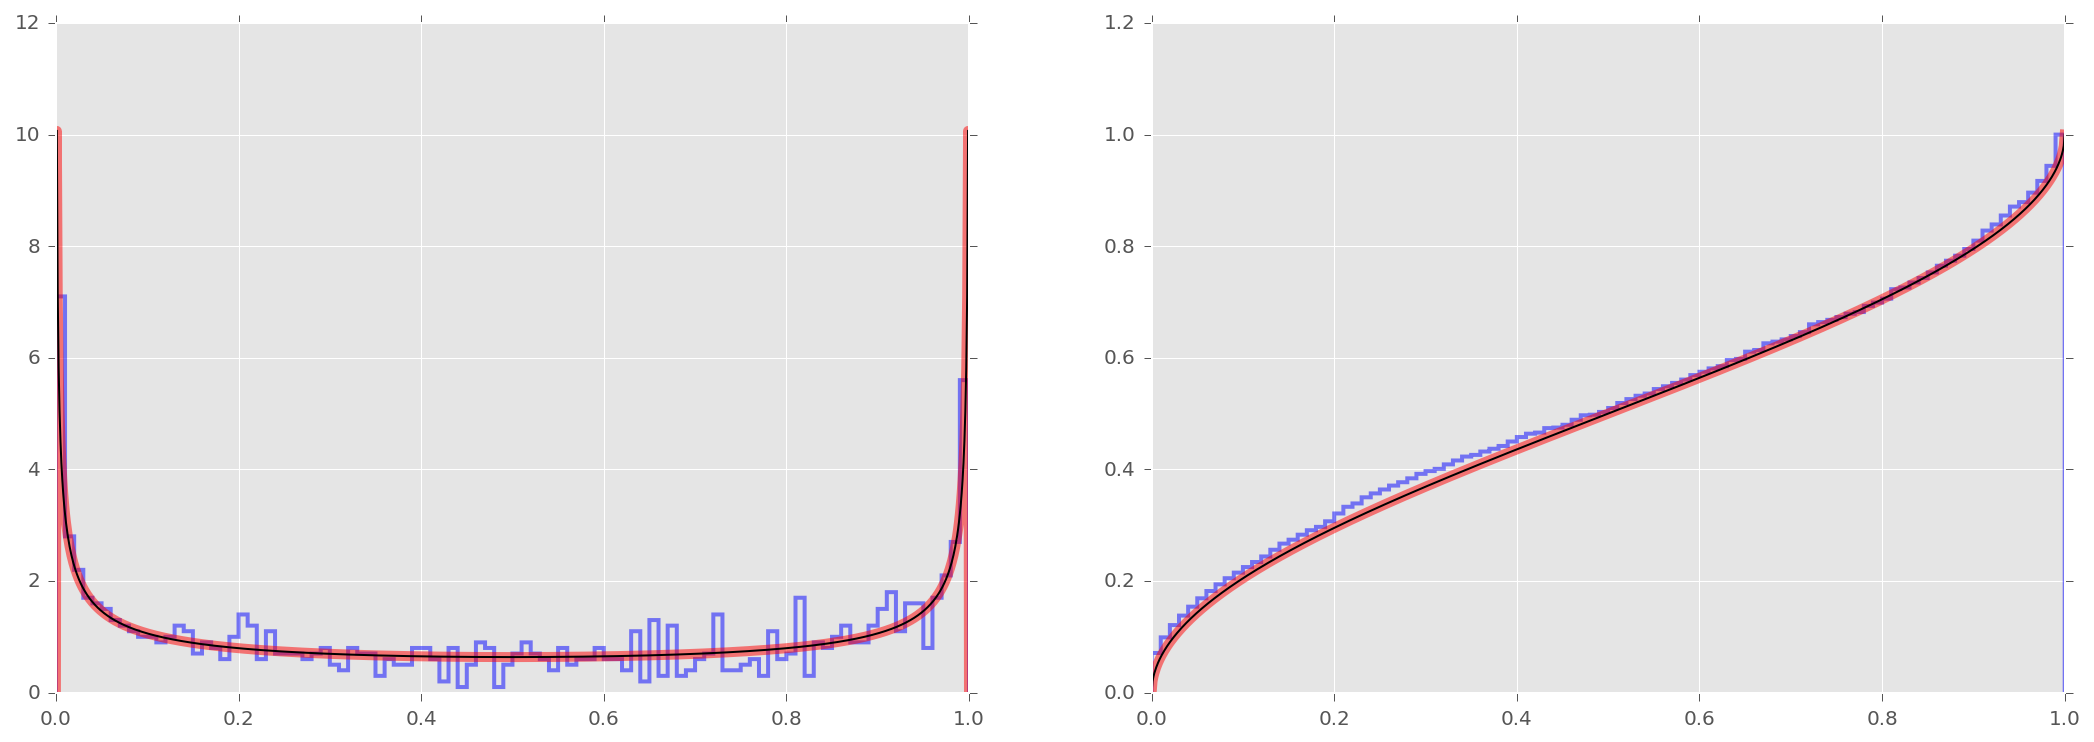

In [2]:
N  = 1000
x  = np.linspace(0,1,N)
r  = stats.arcsine.rvs(size=N)

def arcsinepdf(x):
    return 1/(np.pi*np.sqrt(x*(1-x)))
def arcsinecdf(x):
    return 2/np.pi*np.arcsin(np.sqrt(x))

plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2)

ax0 = plt.subplot(gs[0])
ax0.plot(x, stats.arcsine.pdf(x),
         'r-', lw=5, alpha=0.5, label='arcsine pdf')
ax0.plot(x, arcsinepdf(x), 'k-', lw=1)
ax0.hist(r, normed=True, histtype='step', cumulative=False,
         alpha=0.5,bins=100,lw=2,color='b')
    
ax1 = plt.subplot(gs[1])
ax1.plot(x, stats.arcsine.cdf(x),
         'r-', lw=5, alpha=0.5, label='arcsine cdf')
ax1.plot(x, arcsinecdf(x), 'k-', lw=1)
ax1.hist(r, normed=True, histtype='step', cumulative=True,
         alpha=0.5,bins=100,lw=2,color='b')
plt.show()

## Generate one-dimensional Wiener process on [0,1]

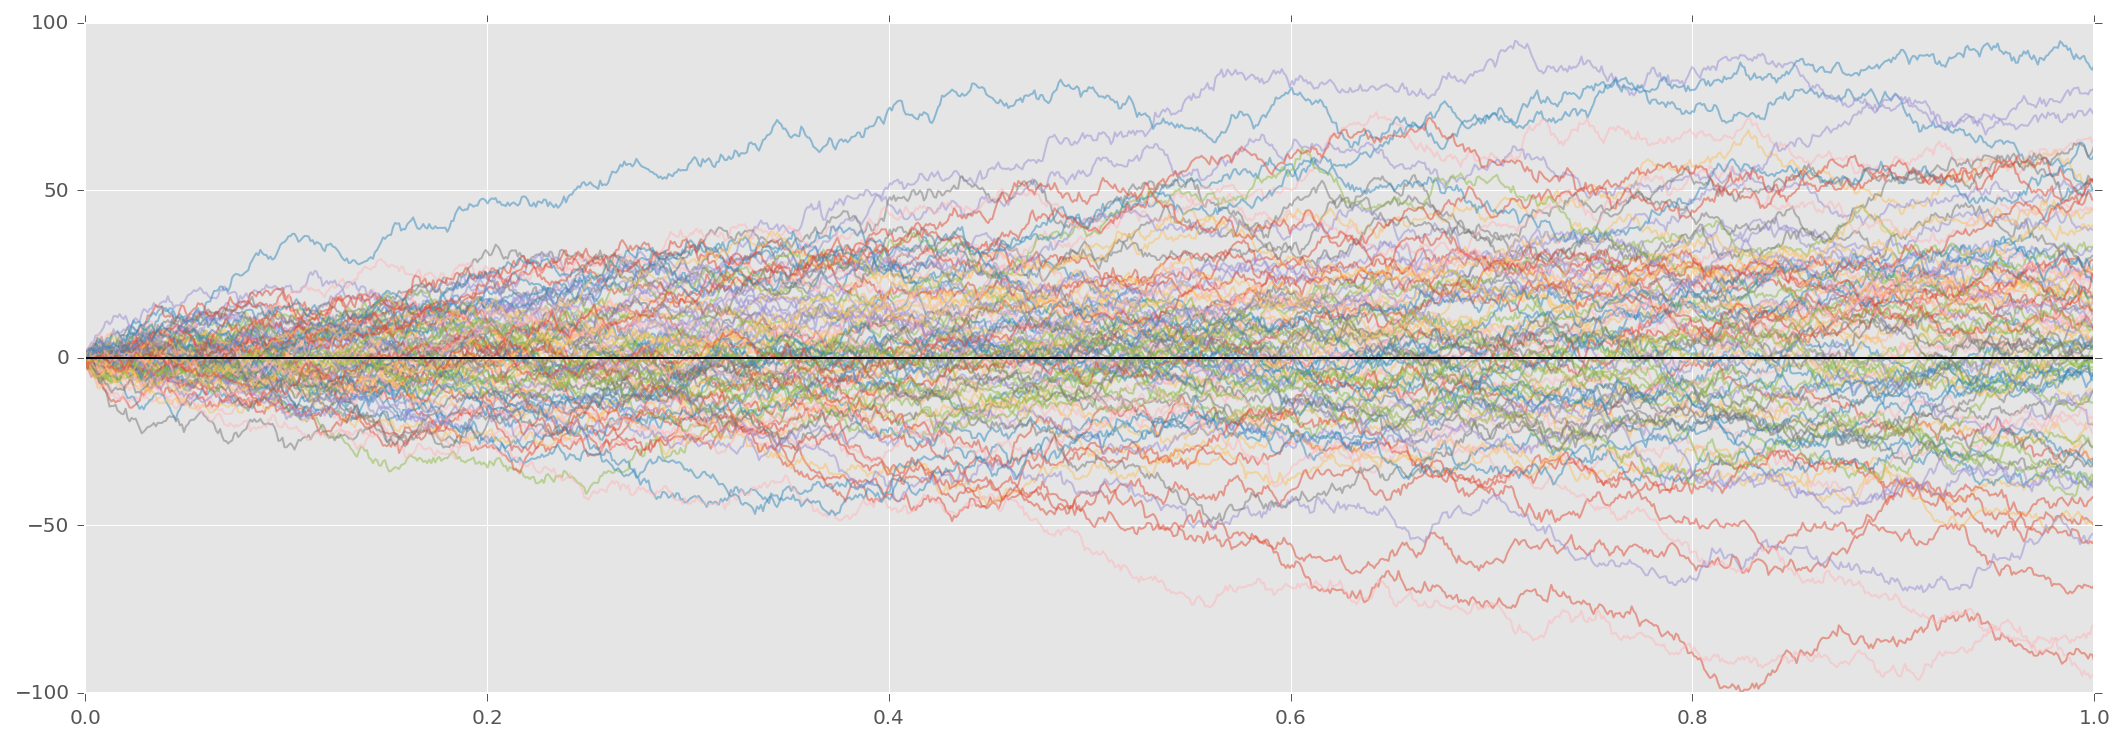

In [3]:
Nprocess = 1000

Wiener = np.cumsum(np.random.randn(Nprocess,N),axis=0)
Wiener[0,:]=0
plt.figure(figsize=(18,6))
plt.plot(x,Wiener[:,:100],alpha=.5)
plt.plot(x,np.zeros(shape=x.shape),color='k',lw=1)
plt.show()

# First (Lévy's) arcsine law
The first arcsine law states that the proportion of time that the one-dimensional Wiener process is positive follows an arcsine distribution. Let  
$$
T_{+}=|\{ t \in [0,1] : W_t \gt 0 \}|
$$  
be the measure of the set of times in [0,1] at which the Wiener process is positive. Then $T_{+}$ is arcsine distributed

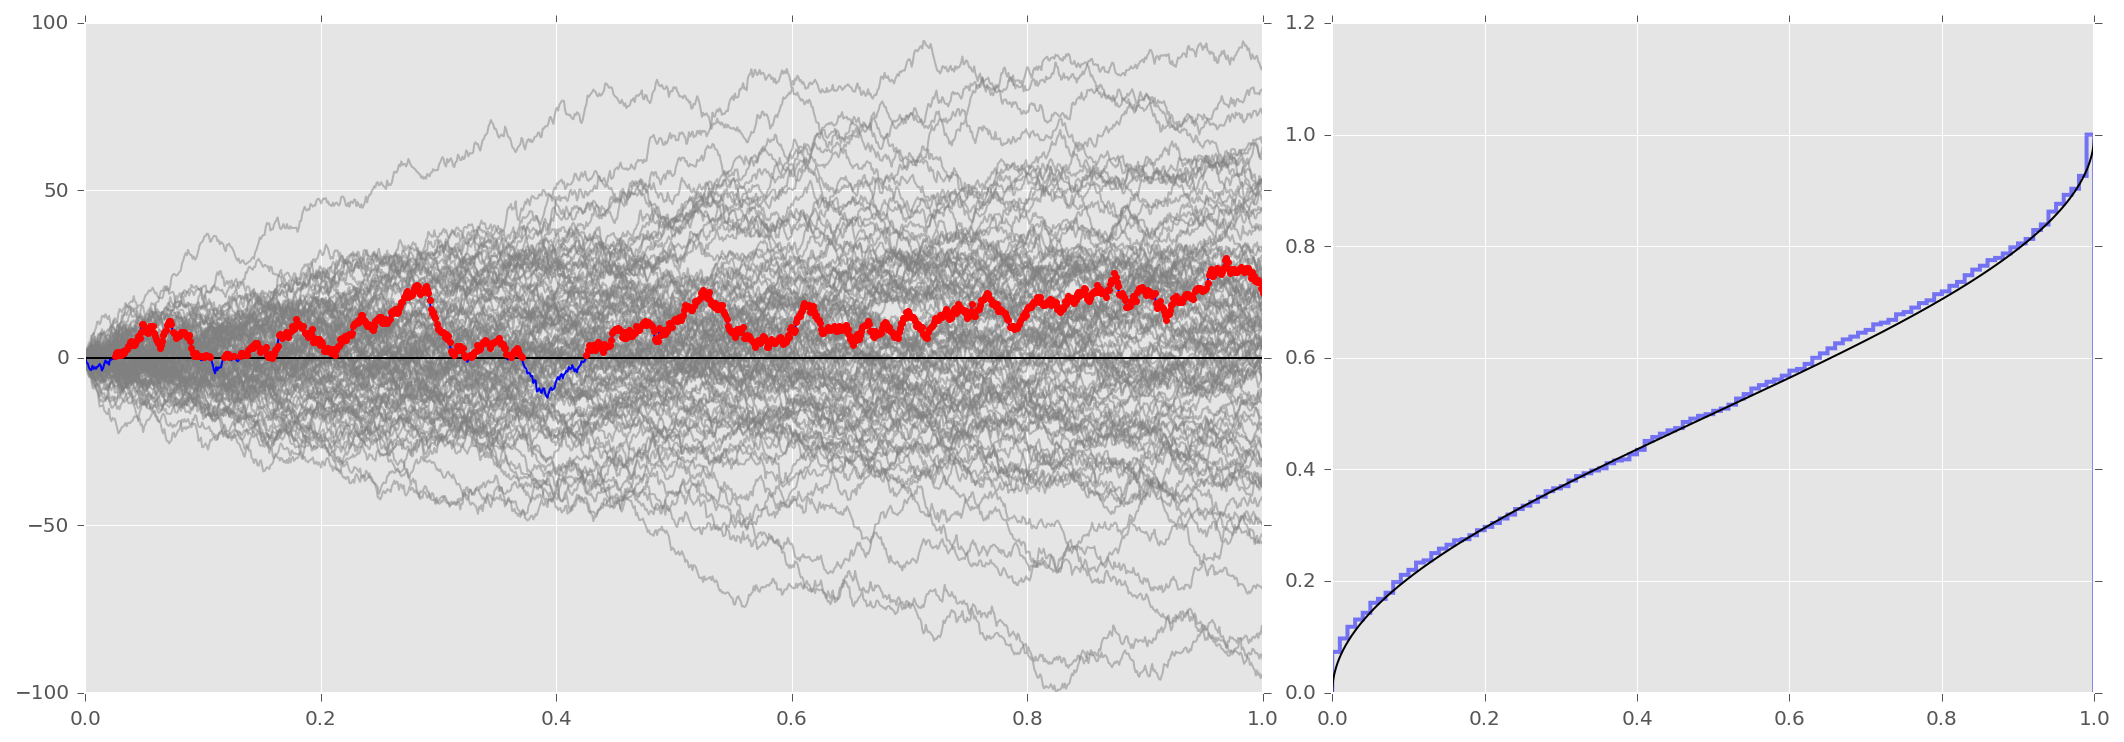

In [4]:
timediff = np.hstack([0,np.diff(x)])
Tplus    = np.zeros(N)
for iw in range(Nprocess):
    Wiener_it = Wiener[:,iw]
    Tplus[iw] = np.sum(timediff[Wiener_it>0])

plt.figure(figsize=(18,6))
gs2 = gridspec.GridSpec(1, 5)

ax0 = plt.subplot(gs2[0,0:3])
ax0.plot(x,Wiener[:,:100],color='gray',alpha=.5)
ax0.plot(x,Wiener[:,-1], color='b')
ax0.plot(x,np.zeros(shape=x.shape),color='k',lw=1)
ax0.plot(x[Wiener[:,-1]>0],Wiener[Wiener[:,-1]>0,-1],'r.')

ax1 = plt.subplot(gs2[0,3:5])
ax1.plot(x, arcsinecdf(x), 'k-', lw=1)
ax1.hist(Tplus, normed=True, histtype='step', cumulative=True,
         alpha=0.5,bins=100,lw=2,color='b')
         
plt.show()

# Second arcsine law
The second arcsine law describes the distribution of the last time the Wiener process changes sign. Let  
$$
L = sup \{ t \in [0,1] : W_t = 0 \}
$$  
be the last time of the last zero. Then $L$ is arcsine distributed

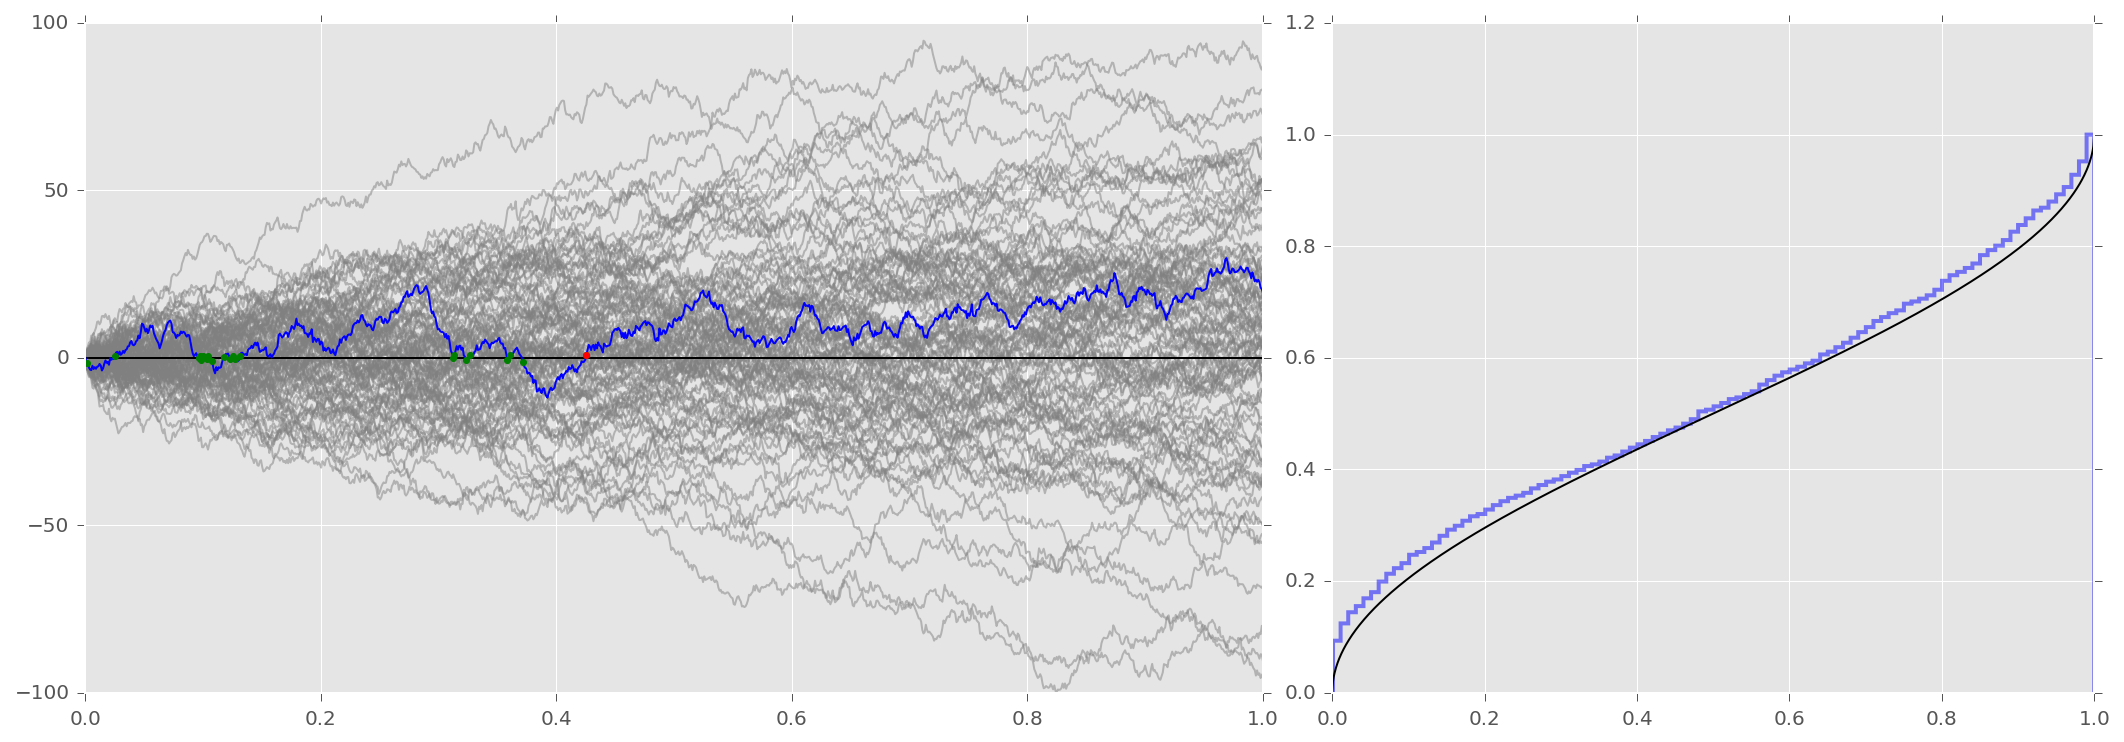

In [5]:
L    = np.zeros(N,dtype=int)
for iw in range(Nprocess):
    Wiener_it = Wiener[:,iw]
    signchange= np.hstack([0,np.diff(np.sign(Wiener_it))])!=0
    L[iw]     = np.where(signchange)[0][-1]

plt.figure(figsize=(18,6))

ax0 = plt.subplot(gs2[0,0:3])
ax0.plot(x,Wiener[:,:100],color='gray',alpha=.5)
ax0.plot(x,np.zeros(shape=x.shape),color='k',lw=1)
ax0.plot(x,Wiener[:,-1], color='b')
ax0.plot(x[signchange],Wiener[signchange,-1],'g.',lw = 5)
ax0.plot(x[L[-1]],Wiener[L[-1],-1],'r.',lw = 5)

ax1 = plt.subplot(gs2[0,3:5])
ax1.plot(x, arcsinecdf(x), 'k-', lw=1)
ax1.hist(x[L], normed=True, histtype='step', cumulative=True,
         alpha=0.5,bins=100,lw=2,color='b')
         
plt.show()

# Third arcsine law
The third arcsine law states that the time at which a Wiener process achieves its maximum is arcsine distributed.  
The statement of the law relies on the fact that the Wiener process has an almost surely unique maxima, and so we can define the random variable M which is the time at which the maxima is achieved. i.e. the unique M such that  
$$
M_{t} = sup \{ W_s : s \in [0,1] \}
$$  
Then $M_{t}$ is arcsine distributed

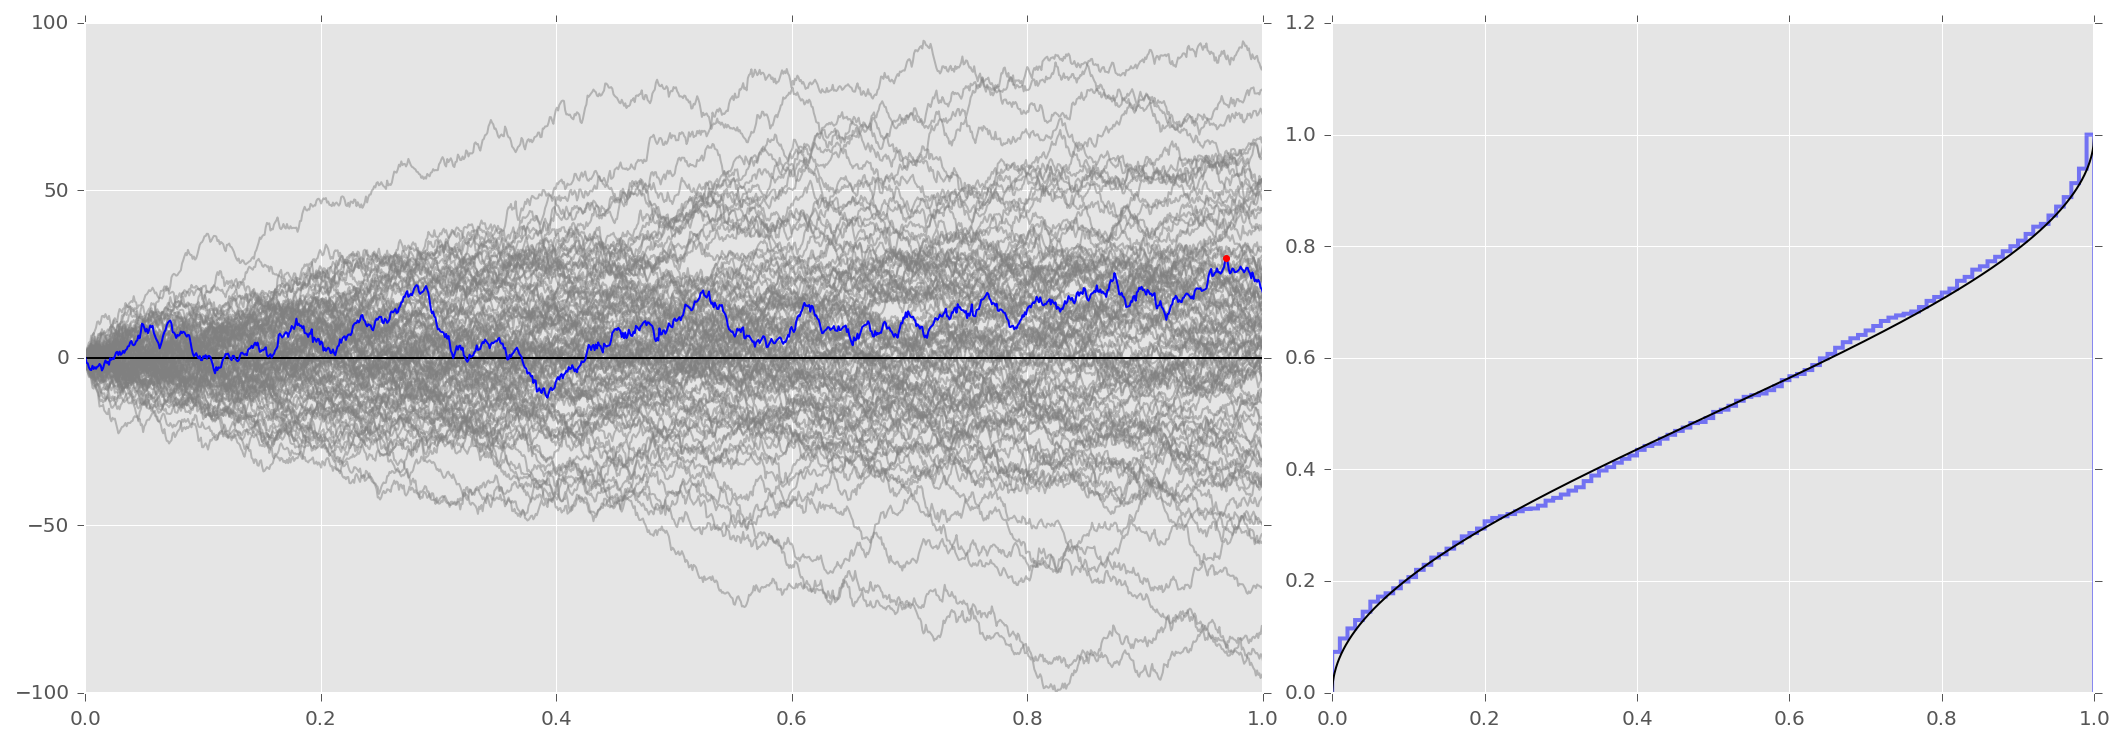

In [6]:
W    = np.zeros(N,dtype=int)
for iw in range(Nprocess):
    Wiener_it = Wiener[:,iw]
    W[iw]     = Wiener_it.argmax()

plt.figure(figsize=(18,6))

ax0 = plt.subplot(gs2[0,0:3])
ax0.plot(x,Wiener[:,:100],color='gray',alpha=.5)
ax0.plot(x,np.zeros(shape=x.shape),color='k',lw=1)
ax0.plot(x,Wiener[:,-1], color='b')
ax0.plot(x[W[-1]],Wiener[W[-1],-1],'r.',lw = 5)

ax1 = plt.subplot(gs2[0,3:5])
ax1.plot(x, arcsinecdf(x), 'k-', lw=1)
ax1.hist(x[W], normed=True, histtype='step', cumulative=True,
         alpha=0.5,bins=100,lw=2,color='b')
         
plt.show()